In [1]:
# Name- Anvesha Raikwar
# PRN- 21070126017
# Branch- AIML_A1

In [2]:
# Write Python scripts using OpenCV and scikit-image to perform
# basic image processing tasks on a sample image from your chosen dataset.
# Share the code and results.


In [3]:
pip install opencv-python scikit-image


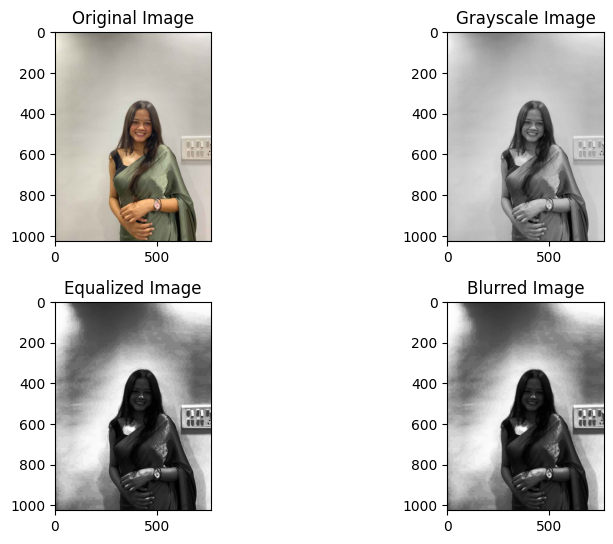

In [4]:
import cv2
from skimage import io
from skimage import color
from skimage import exposure
from skimage import filters
from skimage import morphology
import matplotlib.pyplot as plt

# Loading the sample image
image_path = "/content/best photo -2.jpg"
img = io.imread(image_path)

# Displaying the original image
plt.figure(figsize=(8, 8))
plt.subplot(3, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Converting the image to grayscale
gray_img = color.rgb2gray(img)
plt.subplot(3, 2, 2)
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')

# Applying histogram equalization for better contrast
equalized_img = exposure.equalize_hist(gray_img)
plt.subplot(3, 2, 3)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')

# Applying Gaussian blur to reduce noise
blurred_img = filters.gaussian(equalized_img, sigma=1)
plt.subplot(3, 2, 4)
plt.imshow(blurred_img, cmap='gray')
plt.title('Blurred Image')

plt.tight_layout()
plt.show()


In [5]:
# Implement various thresholding techniques using OpenCV on a subset
# of your dataset. Compare and contrast the results. Discuss the
# challenges faced during this process.

Enter the path to the first image: /content/best photo -2.jpg
Enter the path to the second image: /content/picture 3-2-2-min.jpg


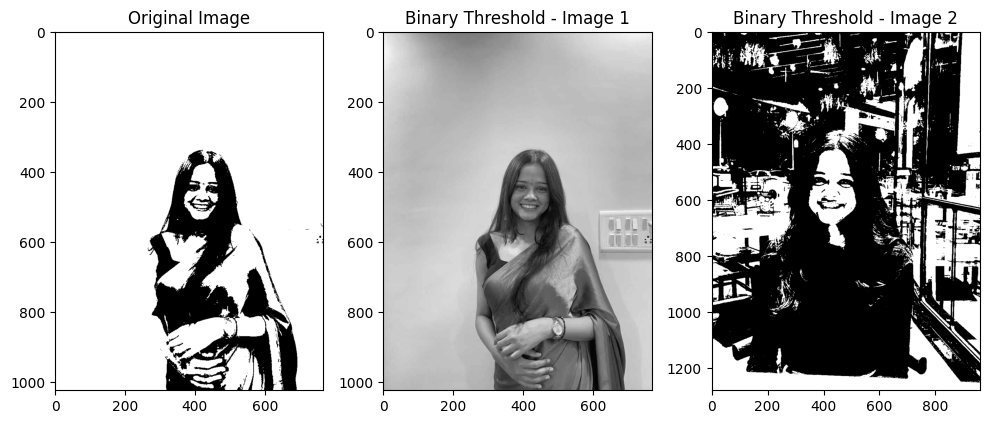

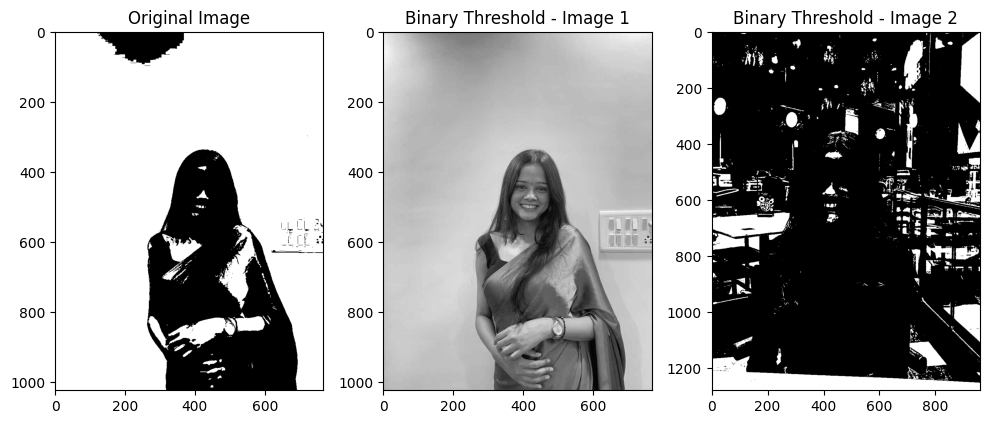

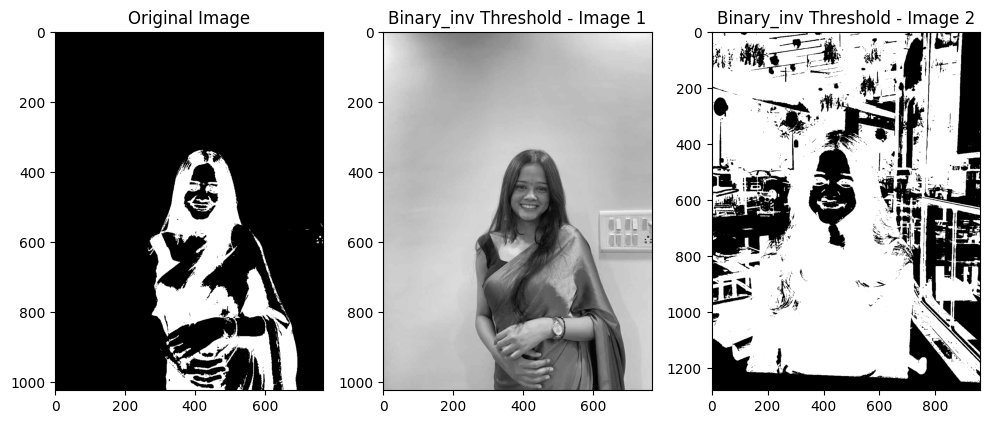

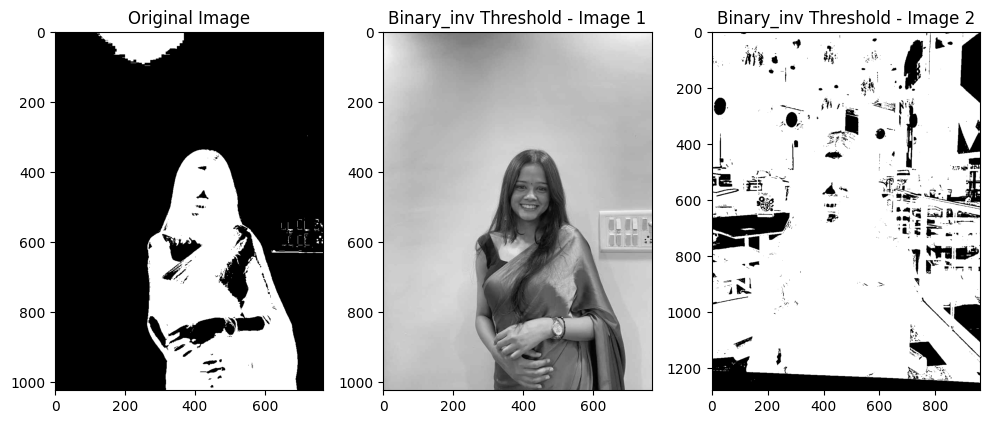

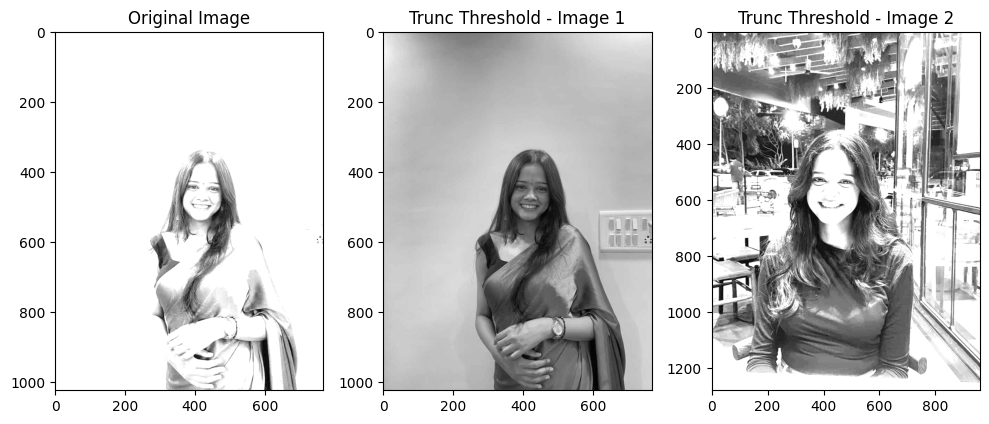

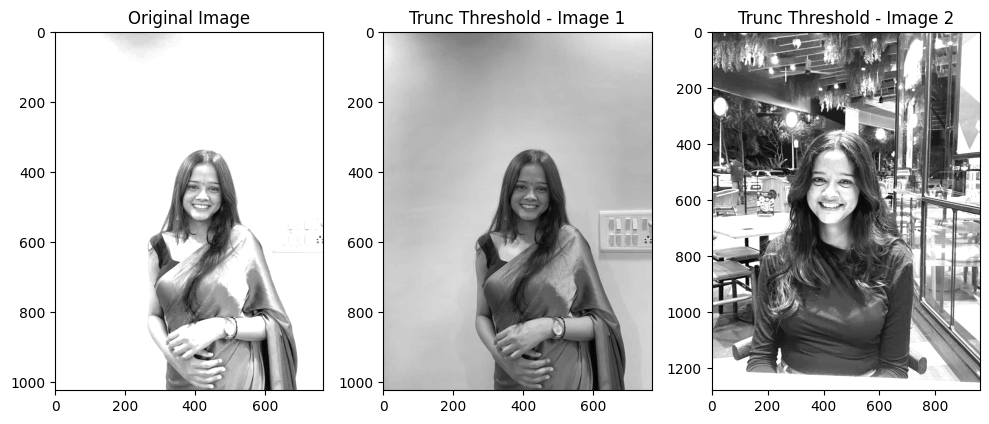

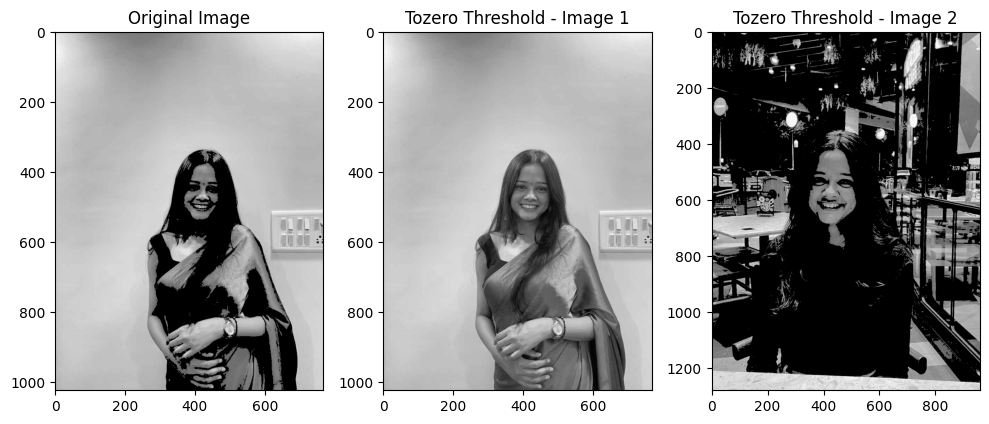

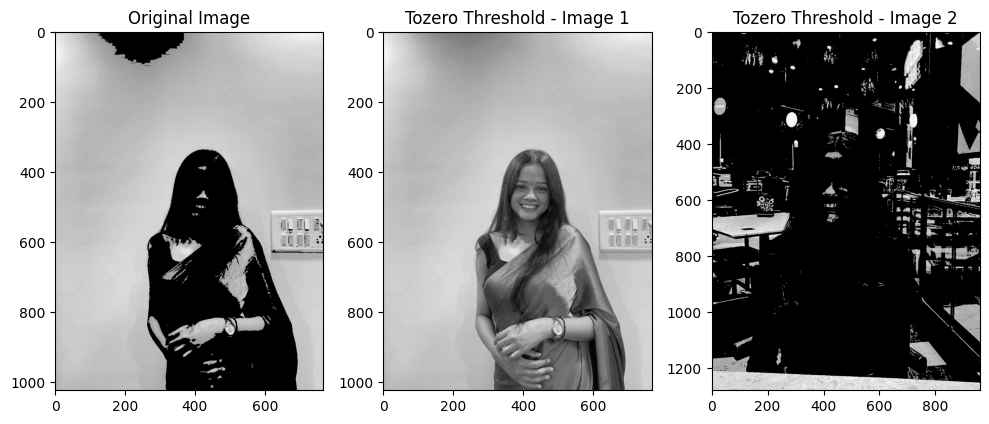

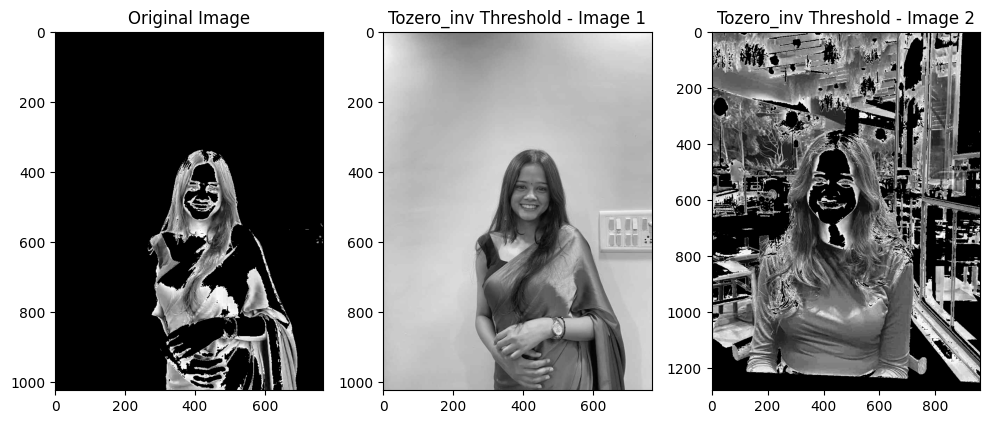

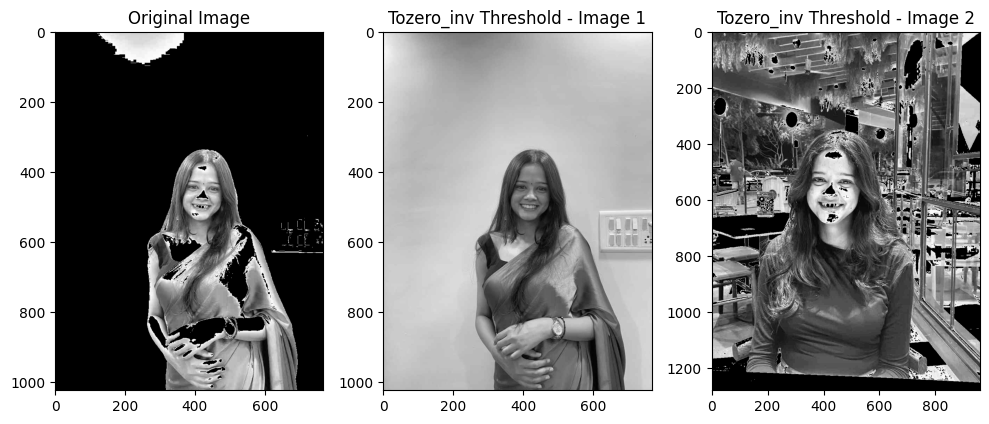

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_thresholding(image, method, *args):
    if method == "binary":
        _, thresholded = cv2.threshold(image, *args, cv2.THRESH_BINARY)
    elif method == "binary_inv":
        _, thresholded = cv2.threshold(image, *args, cv2.THRESH_BINARY_INV)
    elif method == "trunc":
        _, thresholded = cv2.threshold(image, *args, cv2.THRESH_TRUNC)
    elif method == "tozero":
        _, thresholded = cv2.threshold(image, *args, cv2.THRESH_TOZERO)
    elif method == "tozero_inv":
        _, thresholded = cv2.threshold(image, *args, cv2.THRESH_TOZERO_INV)
    else:
        raise ValueError("Invalid thresholding method")

    return thresholded

def plot_comparison(image, original, thresholded, title1, title2):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original Image")

    plt.subplot(1, 3, 2)
    plt.imshow(image, cmap='gray')
    plt.title(title1)

    plt.subplot(1, 3, 3)
    plt.imshow(thresholded, cmap='gray')
    plt.title(title2)

    plt.tight_layout()
    plt.show()

# Taking two images
image_path1 = input("Enter the path to the first image: ")
image_path2 = input("Enter the path to the second image: ")

# Reading images
image1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

# Applying various thresholding techniques
methods = ["binary", "binary_inv", "trunc", "tozero", "tozero_inv"]
threshold_values = [100, 150]  # Adjusting these values based on the images

for method in methods:
    for threshold_value in threshold_values:
        thresholded1 = apply_thresholding(image1, method, threshold_value, 255)
        thresholded2 = apply_thresholding(image2, method, threshold_value, 255)

        title1 = f"{method.capitalize()} Threshold - Image 1"
        title2 = f"{method.capitalize()} Threshold - Image 2"

        plot_comparison(image1, thresholded1, thresholded2, title1, title2)


In [7]:
# Apply clustering algorithms (e.g., K-means, DBSCAN) to segment
# images from your dataset. Evaluate the effectiveness of each algorithm.

Enter the path to the image: /content/best photo -2.jpg


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


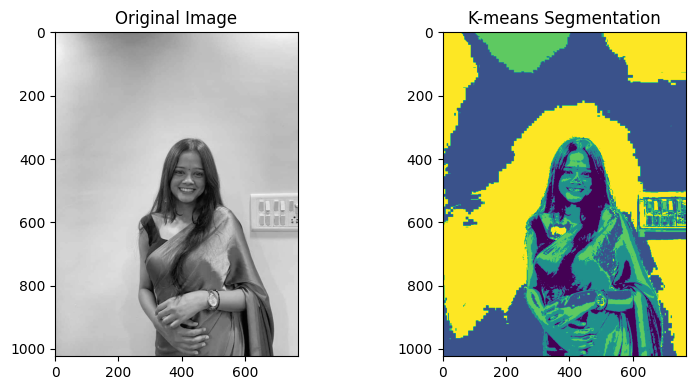

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from skimage import color

# Function to apply K-means clustering
def apply_kmeans(image, num_clusters):
    reshaped_image = image.reshape((-1, 1))
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(reshaped_image)
    segmented_image = kmeans.labels_.reshape(image.shape)
    return segmented_image

image_path = input("Enter the path to the image: ")
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Converting to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Preprocessing the image
lab_image = color.rgb2lab(image)[:,:,0]

# Applying K-means clustering
num_clusters = 5
kmeans_segmented = apply_kmeans(lab_image, num_clusters)

# Ploting results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(lab_image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(kmeans_segmented, cmap='viridis')
plt.title("K-means Segmentation")

plt.tight_layout()
plt.show()


Enter the path to the image: /content/picture 3-2-2-min.jpg


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


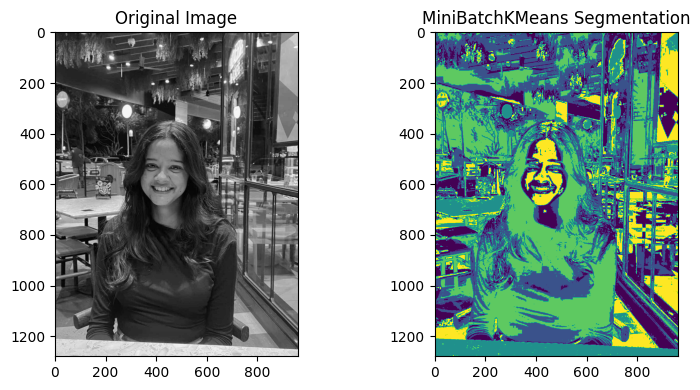

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from skimage import color

# Function to apply MiniBatchKMeans clustering
def apply_mini_batch_kmeans(image, num_clusters):
    reshaped_image = image.reshape((-1, 1))
    mbkmeans = MiniBatchKMeans(n_clusters=num_clusters, random_state=42)
    mbkmeans.fit(reshaped_image)
    segmented_image = mbkmeans.labels_.reshape(image.shape)
    return segmented_image


image_path = input("Enter the path to the image: ")
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Applying MiniBatchKMeans clustering
num_clusters = 5
mini_batch_kmeans_segmented = apply_mini_batch_kmeans(image, num_clusters)

# Ploting results
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(mini_batch_kmeans_segmented, cmap='viridis')
plt.title("MiniBatchKMeans Segmentation")

plt.tight_layout()
plt.show()




In [9]:
# Choose a pre-trained deep learning model (e.g., U-Net, DeepLab)
# and apply it to your dataset. Share the model, code, and results.
# Discuss the strengths and limitations of deep learning in image
# segmentation.


In [10]:
pip install tensorflow Pillow


1/1 [==============================] - 8s 8s/step


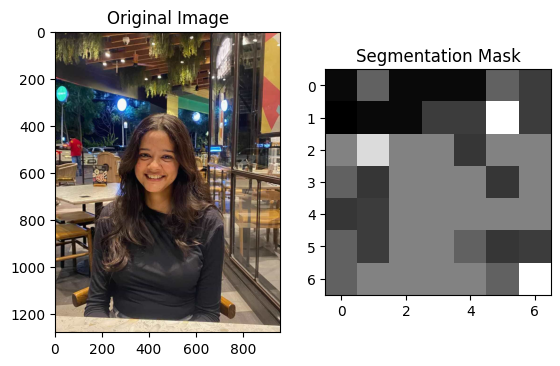

In [12]:
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Loading the pre-trained DeepLab model
model = tf.keras.applications.DenseNet201(weights='imagenet', include_top=False, input_shape=(None, None, 3))

# Loading and preprocess the input image
image_path = "/content/picture 3-2-2-min.jpg"
img = Image.open(image_path)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.image.resize(img_array, (224, 224))  # Resize to match the input size of the model
img_array = tf.keras.applications.densenet.preprocess_input(img_array[tf.newaxis, ...])

# Making predictions using the DeepLab model
predictions = model.predict(img_array)

threshold = 0.5
segmentation_mask = (predictions > threshold).astype(np.uint8)

# Converting the three-dimensional mask to a two-dimensional grayscale image
output_mask = Image.fromarray(np.argmax(segmentation_mask[0], axis=-1).astype(np.uint8) * 255, 'L')

# Displaying the original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')

# Displaying the segmentation mask
plt.subplot(1, 2, 2)
plt.imshow(output_mask, cmap='gray')
plt.title('Segmentation Mask')

plt.show()
